In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

In [2]:
D_path = glob.glob('Data\Dyslexic' + "\*")
C_path = glob.glob('Data\Control' + "\*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)

D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)

In [3]:
data = C_data[0]
data

,T,LX,LY,RX,RY
0,0.0,0.00000,0.00000,0.00000,0.00000
1,20.0,0.65535,-0.00001,0.65536,-0.65536
2,40.0,0.65534,-0.00001,0.65536,-0.65536
3,60.0,0.65534,-0.00001,0.65535,-0.65536
4,80.0,0.65534,-0.00001,0.65534,0.00000
...,...,...,...,...,...
1494,29880.0,103.54872,37.35520,104.85945,36.69984
1495,29900.0,105.51480,36.04447,106.17018,32.76765
1496,29920.0,107.48088,27.52472,108.79159,14.41743
1497,29940.0,108.13612,-16.38473,102.89310,-78.64416


In [4]:
C_new = []
for data in C_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    C_new.append(f)

In [5]:
D_new = []
for data in D_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    D_new.append(f)

In [6]:
trial = C_new[4]

In [7]:
x = trial['X']
y = trial['Y']
t = trial['T']

In [8]:
z=[]
for i in range(0,x.size):
    z.append(complex(x[i],y[i]))

In [9]:
Z = np.fft.fft(z)

C:\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


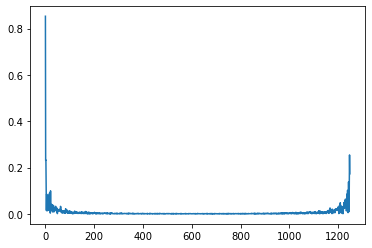

In [10]:
plt.plot(abs(Z)/max(Z))

In [11]:
Z_norm = abs(Z)
Z_norm = Z_norm/ max(Z_norm)

In [12]:
max_C =[]
max_D =[]
for i in range(len(C_new)):
    max_C.append(len(C_new[i]))
for i in range(len(D_new)):
    max_D.append(len(D_new[i]))
print(set(max_C))
print(set(max_D))

{1249, 999, 1999, 1749, 1499}
{1499, 1999}


In [13]:
L = len(Z_norm)
k = int((len(Z_norm) + 1)/250) # k varies from 4 to 8
N = 150
B  = 2*k
E =round((N*B - L)/(N-1))
step_size = B-E
bucket_size = B
binval=[]
for a in range(0,(L + 1)-(bucket_size), step_size):
    binval = np.append(binval, sum(np.abs(Z_norm[a:a+bucket_size])))
binval = np.append(binval, sum(np.abs(Z_norm[-(bucket_size):])))    

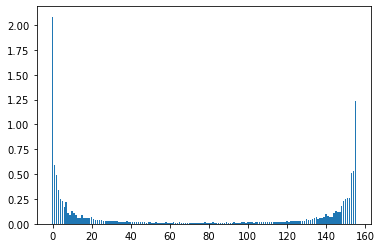

In [14]:
bin_xn = binval.tolist()
ht = bin_xn
ind = list(range(len(ht)))
plt.bar(ind, ht)
plt.show()

In [15]:
len(ind)

156

In [16]:
C_bins = []
for j in range(len(C_new)):
    dat = C_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
    Z = np.fft.fft(z)
        
    Z_norm = abs(Z)/ max(Z_norm)
    
    L = len(Z_norm)
    k = int((len(Z_norm) + 1)/250) # k varies from 4 to 8
    N = 10
    B  = 2*k ### chose the factor to be greater than (250/N), for overlap to exist
    E =round((N*B - L)/(N-1))
    step_size = B-E
    bucket_size = B
    bin_val=[]
    for a in range(0,(len(Z_norm) + 1)-(bucket_size), step_size):
        bin_val = np.append(bin_val, sum(np.abs(Z_norm[a:a+bucket_size])))
    binval = np.append(binval, sum(np.abs(Z_norm[-(bucket_size):])))
    bin_val = bin_val/(max(bin_val))
    C_bins.append(bin_val.tolist())


In [17]:
D_bins = []
for j in range(len(D_new)):
    dat = D_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
    Z = np.fft.fft(z)
        
    Z_norm = abs(Z)/ max(Z_norm)
    
    L = len(Z_norm)
    k = int((len(Z_norm) + 1)/250) # k varies from 4 to 8
    N = 10
    B  = 2*k
    E =round((N*B - L)/(N-1))
    step_size = B-E
    bucket_size = B
    bin_val=[]
    for a in range(0,(len(Z_norm) + 1)-(bucket_size), step_size):
        bin_val = np.append(bin_val, sum(np.abs(Z_norm[a:a+bucket_size])))
    binval = np.append(binval, sum(np.abs(Z_norm[-(bucket_size):])))
    bin_val = bin_val/(max(bin_val))
    D_bins.append(bin_val.tolist())

1499
1999
1249
1999
1249
1999
1999
1999
1999
1999


<function matplotlib.pyplot.show(*args, **kw)>

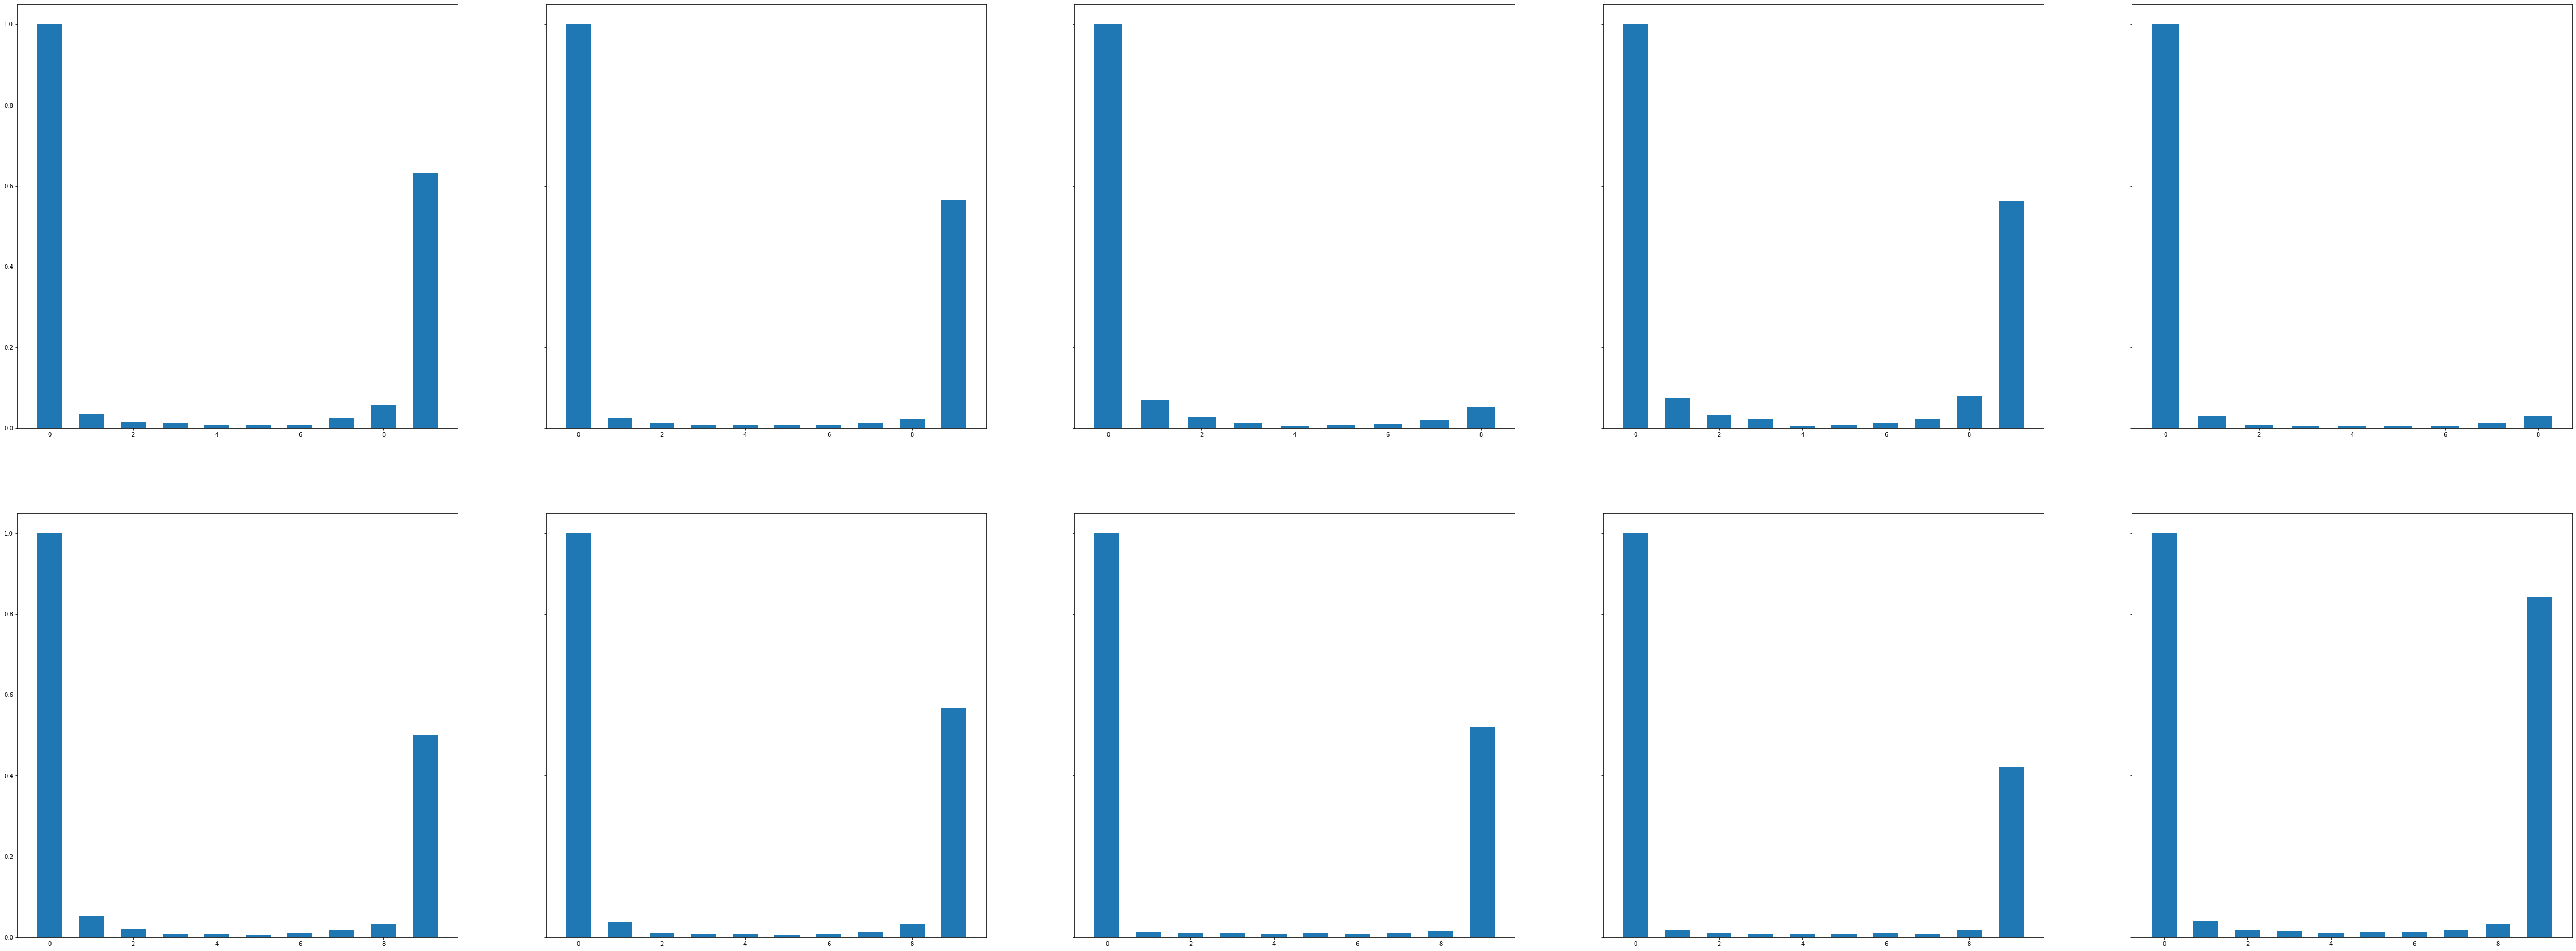

In [18]:
#FFT Normalized
fig,ax = plt.subplots(2,5, sharey= True, figsize = (80,30) )
for j in range(5):
    print(len(C_new[j]))
    ht = C_bins[j]
    ind = list(range(len(ht)))
    ax[0][j%5].bar(ind, ht, width=0.6)

for j in range(5):
    print(len(D_new[j]))
    ht = D_bins[j]
    ind = list(range(len(ht)))
    ax[1][j].bar(ind, ht, width=0.6)
    
plt.show

In [19]:
for i in range(4,9):
    N = 200
    L = 250*i
    B = 2*i
    E =(N*B - L)/(N-1)
    E = round(E)
    g = [N,L,B,E]
    print(g)

[200, 1000, 8, 3]
[200, 1250, 10, 4]
[200, 1500, 12, 5]
[200, 1750, 14, 5]
[200, 2000, 16, 6]
